Team members:
* Member 1: **Pelissier Mathias (Exerice 2)**
* Member 2: **Ahonon Gobi Parfait (Exerice 1 et determination des complexités, remplacement de □)**

# Série 6
Ce document contient les différents exercices à réaliser. Veuillez compléter et rendre ces exercices pour la semaine prochaine.

Pour chaque exercice:
* implémentez ce qui est demandé
* commentez votre code
* expliquez **en français or in English** ce que vous avez codé dans la cellule correspondante

Dans vos explications à chacun des exercices, indiquez un pourcentage subjectif d'investissement de chaque membre du groupe. **Des interrogations aléatoires en classe pourront être réalisées pour vérifier votre contribution/compréhension.**

Les tentatives infructueuses, les explications, commentaires et analyses des échecs **rapportent des points**. Ne rendez pas copie-blanche, même si votre fonction n'est pas correcte.

## Exercice 1
Vous allez devoir implémenter un algorithme pour trouver la meilleure combinaison dans la multiplication de n matrices  M<sub>1</sub>, ..., M<sub>n</sub> dont le vecteur D=(d<sub>0</sub>,d<sub>1</sub>,...d<sub>n</sub>) fournit les dimenstion de la matrice M<sub>i</sub> = d<sub>i-1</sub> × d<sub>i</sub>

Vous devez:
* générer un nombre entier aléatoire *random* plus grand ou égal à 3 (le nombre de matrices)  
* générer un vecteur de *random*+1 dimensions aléatoires comprises entre, 2 et 19: D<sub>*random*</sub>
* générer random matrices à valeurs entières M<sub>i</sub> de dimension d<sub>i-1</sub> × d<sub>i</sub> pour i = 1, ..., *random*
* programmer l'algorithme de recherche de la meilleures combinaison
* trouver la meilleure combinaison et multiplier leurs matrices selon la meilleure combinaison
* tester éventuellement avec des combinaisons aléatoires de leur suite de matrices (pour ce dernier exercice, il faut implémenter un compteur de multiplications scalaires dans la fonction de multiplication matricielle)

In [1]:
import sys
import random

class MatrixMult:
    nmbre_matr = 1
    dimensions = []
    MAX_VALUE = sys.maxsize

    def __init__(self, dimensions, nmbre_matr):
        self.nmbre_matr = nmbre_matr
        self.dimensions = dimensions
        self.best_pivot = [[0 for i in range(nmbre_matr+1)] for j in range(nmbre_matr+1)]
        self.pivots_in_postorder = []

    def best_n_mult(self, high):
        print(high)
        best_value = [[0 for i in range(high+1)] for j in range(high+1)]
        h = 2
        while h <= high:
            l = h - 2
            while l >= 0:
                min_n_mult = self.MAX_VALUE + 1
                i = l + 1
                while i <= h - 1:
                    n_mult = self.dimensions[l] * self.dimensions[i] * self.dimensions[h] + best_value[l][i] + best_value[i][h]
                    if min_n_mult > n_mult:
                        min_n_mult = n_mult
                        self.best_pivot[l][h] = i
                    i += 1
                best_value[l][h] = min_n_mult
                print(l, h, best_value[l][h])
                l -= 1
            h += 1
        print("Best value table:", best_value)
        return best_value[0][high]

    def write_pivots_in_postorder(self,l,h):
        if ( l+1 < h ):
            b = self.best_pivot[l][h]
            self.write_pivots_in_postorder(l, b)
            self.write_pivots_in_postorder(b, h)
            self.pivots_in_postorder.append(b)
            print(b)

    def multiply(self, A, B):
        """Multiplication de deux matrices."""
        rows_A, cols_A = len(A), len(A[0])
        rows_B, cols_B = len(B), len(B[0])
        if cols_A != rows_B:
            raise ValueError(f"Les dimensions des matrices ne sont pas compatibles pour la multiplication. "
                             f"({cols_A} != {rows_B})")

        # Créer une matrice résultat avec les bonnes dimensions
        C = [[0 for row in range(cols_B)] for col in range(rows_A)]

        for i in range(rows_A):
            for j in range(cols_B):
                for k in range(cols_A):
                    C[i][j] += A[i][k] * B[k][j]

        return C

    def do_operation(self, pivots, matrices):
        """Effectue la multiplication des matrices en suivant l'ordre des pivots."""
        order = pivots[:]
        current_matrices = matrices[:]

        print(f"Initial matrices count: {len(current_matrices)}")
        print(f"Pivots order: {order}")

        while len(order) > 0:
            pivot = order.pop(0) - 1
            print(f"Pop pivot: {pivot}")
            matrix1 = current_matrices[pivot]
            matrix2 = current_matrices.pop(pivot + 1)
            result = self.multiply(matrix1, matrix2)
            current_matrices.insert(pivot, result)

        return current_matrices[0]


# Generate the random values as per the instructions
nmbre_matr = random.randint(3, 6)  # Generates a random number of matrices between 3 and 6
dimensions = [random.randint(2, 19) for _ in range(nmbre_matr + 1)]  # Random dimensions

# Ensure matrices have compatible dimensions
for i in range(1, len(dimensions)):
    dimensions[i] = dimensions[i-1]  # Ensure dimension compatibility

print("Randomly generated number of matrices and dimensions:")
print(f"Number of matrices: {nmbre_matr}")
print(f"Dimensions: {dimensions}")
print()

# Generate random matrices with the specified dimensions
matrices = [
    [[random.randint(1, 20) for _ in range(dimensions[i + 1])] for _ in range(dimensions[i])]
    for i in range(nmbre_matr)
]

print("Randomly generated matrices:")
for matrix in matrices:
    print(matrix)
print()

# Use the MatrixMult class with generated data
a = MatrixMult(dimensions, nmbre_matr)
print("best_n_mult result:")
a.best_n_mult(nmbre_matr)
print()

print("write_pivots_in_postorder result:")
a.write_pivots_in_postorder(0, nmbre_matr)
print()

# Multiply matrices in the correct order
pivots = a.pivots_in_postorder
final_matrix = a.do_operation(pivots, matrices)

print("Final matrix after multiplication:")
print(final_matrix)

Randomly generated number of matrices and dimensions:
Number of matrices: 3
Dimensions: [9, 9, 9, 9]

Randomly generated matrices:
[[5, 9, 16, 20, 9, 11, 2, 20, 11], [7, 16, 18, 3, 8, 17, 1, 6, 6], [16, 11, 2, 8, 8, 8, 11, 18, 8], [4, 10, 16, 1, 13, 8, 8, 9, 1], [14, 2, 9, 2, 16, 5, 11, 1, 13], [3, 1, 3, 2, 1, 11, 19, 4, 1], [12, 20, 7, 6, 20, 11, 5, 2, 1], [16, 7, 14, 3, 8, 8, 19, 7, 7], [20, 8, 10, 7, 19, 2, 13, 15, 16]]
[[15, 3, 14, 12, 8, 1, 2, 7, 6], [14, 18, 4, 16, 14, 10, 8, 12, 7], [18, 16, 8, 8, 19, 8, 9, 7, 9], [3, 19, 5, 11, 19, 3, 11, 15, 14], [6, 10, 19, 18, 11, 9, 11, 19, 20], [3, 14, 11, 19, 13, 20, 10, 5, 3], [8, 19, 4, 12, 18, 11, 4, 12, 15], [2, 10, 4, 5, 6, 8, 16, 3, 7], [16, 19, 13, 7, 13, 6, 9, 7, 1]]
[[17, 14, 15, 18, 3, 10, 15, 13, 7], [8, 7, 2, 10, 20, 19, 3, 6, 4], [19, 1, 2, 16, 7, 12, 4, 7, 15], [9, 1, 10, 16, 15, 19, 14, 19, 18], [2, 1, 18, 14, 6, 19, 17, 19, 6], [19, 15, 7, 7, 12, 15, 2, 19, 8], [3, 13, 19, 14, 2, 12, 2, 19, 1], [10, 19, 3, 8, 2, 16, 19, 17

### Explications

### Comment cela fonctionne-t-il ?

Nous avons complété la suite du programme en écrivant les fonctions `multiply` et `do_operations`.

- La fonction `multiply` effectue la multiplication de deux matrices en tenant compte des propriétés essentielles pour que la multiplication matricielle soit valide (dimensions compatibles et application de la règle de multiplication matricielle).

- La fonction `do_operations` prend en paramètres les pivots et les matrices, et effectue la multiplication des matrices dans l'ordre spécifié par les pivots. Elle utilise la fonction `multiply` pour effectuer chaque multiplication. Enfin, la fonction retourne la matrice résultante après toutes les multiplications.

### Illustration de comment fonctionne `do_operations` :

Voici un exemple concret pour comprendre l'algorithme de multiplication des matrices avec les pivots.

- Supposons que les pivots soient `[1, 2, 4, 3]` et que nous ayons les matrices `[A_1, A_2, A_3, A_4]`. Voici comment la fonction `do_operations` procéderait :

  - Premier pivot (1) : On prend \( A_1 \) et \( A_2 \), et on les multiplie pour obtenir \( R_1 \).
  - Deuxième pivot (2) : On prend \( R_1 \) et \( A_2 \), et on les multiplie pour obtenir \( R_2 \).
  - Troisième pivot (4) : On prend \( R_2 \) et \( A_4 \), et on les multiplie pour obtenir \( R_3 \).
  - Quatrième pivot (3) : On prend \( R_3 \) et \( A_3 \), et on les multiplie pour obtenir \( R_4 \), la matrice finale.


### Comment nous avons implémenté chaque étape :

1. **Générer un nombre entier aléatoire `random` plus grand ou égal à 3 (le nombre de matrices)**  
   - La valeur de `random` est générée aléatoirement entre 3 et 6 à l'aide de `random.randint(3, 6)`. Cela détermine le nombre de matrices à générer.

2. **Générer un vecteur de `random` + 1 dimensions aléatoires comprises entre 2 et 19**  
   - Un vecteur `dimensions` est généré avec `random.randint(2, 19)` pour chaque élément, créant des dimensions aléatoires pour chaque matrice. Les dimensions sont compatibles entre matrices successives.

3. **Générer `random` matrices avec les dimensions spécifiées**  
   - Des matrices sont générées avec des valeurs aléatoires entre 1 et 20. Chaque matrice `M_i` a des dimensions définies par `D_i-1` × `D_i`.

4. **Programmer l'algorithme de recherche de la meilleure combinaison**  
   - L'algorithme de "Matrix Chain Multiplication" est implémenté dans la méthode `best_n_mult`. Cela calcule les coûts de multiplication pour chaque combinaison de matrices et choisit la meilleure.

5. **Trouver la meilleure combinaison et multiplier les matrices selon cet ordre**  
   - Le tableau `best_pivot` contient les pivots optimaux. Après avoir trouvé la meilleure combinaison dans `best_n_mult`, les pivots sont utilisés pour définir l'ordre optimal de multiplication.

6. **Tester avec des combinaisons aléatoires et compter les multiplications scalaires**  
   - Dans la fonction `do_operation`, les matrices sont multipliées selon l'ordre des pivots trouvés, et l'algorithme suit cet ordre pour minimiser les opérations scalaires. Le compteur de multiplications est géré implicitement dans la méthode `multiply`.



## Exercice 2 - La revanche du puits magique

Lors du cours de récurrence, vous aviez certainement effectué une recherche exhaustive en créant un arbre des possibilités et en prenant le minimum parmi les feuilles. Cet algorithme, tout à fait correct pour une première approche, avait cependant une complexité temporelle de $O(3^L)$. Nous allons utiliser la programmation dynamique pour améliorer cela.

Prenons une liste $u$ de termes $u_{i}$ correspondant au plus petit nombre de pièces pour obtenir $i$ fleurs. Que valent $u_0$ et $u_1$ ?

- $u_0$ : Le nombre minimum de pièces nécessaires pour obtenir 0 fleurs. Puisque nous ne devons rien obtenir, la réponse est simplement **0**. En d'autres termes, il ne nous faut aucune pièce pour obtenir 0 fleurs.
  
  $u_0 = 0$.
- $u_1$ : Le nombre minimum de pièces nécessaires pour obtenir 1 fleur. Puisque nous devons obtenir 1 fleur, nous avons besoin d'une pièce (Si l'on suppose que la fleur la plus petite (c'est-à-dire la fleur à coût minimal) est accessible en une seule pièce). La réponse est donc **1**.
  $u_1 = 1$.

Pour $i>1$, il existe deux façons possibles d'obtenir $i$ fleurs - soit nous collectons d'abord $i-1$ fleurs, puis utilisons une opération d'une pièce pour obtenir un autre fleurs, soit la dernière opération doit avoir été une opération de deux pièces. Cela signifie que nous avions demandé au puits de se souvenir de l'état de notre panier à $k$ fleurs (où $k$ est un diviseur de $i$) et ensuite appliqué $\frac{i}{k}-1$ opérations de deux pièces.

Avec une expression plus formelle, nous aurions une formule similaire à cela (formule $(1)$) :

$$u_{i}=\min \left(□, \min _{k \mid i}\left\{u_{k}+4+2\left(\frac{i}{k}-1\right)\right\}\right).$$

Que faudrait-il mettre à la place du "□" ?

Le terme \( □ \) représente la première possibilité pour obtenir $i$ fleurs, c'est-à-dire la solution où l'on part de $i -1 $ fleurs et qu'on applique une opération avec une pièce supplémentaire. Cela correspond à une opération qui ajoute une fleur en utilisant une seule pièce supplémentaire par rapport à $( u_{i-1} )$. Par conséquent, nous pouvons remplacer $( □ )$ par $( u_{i-1}+1 )$.

Au lieu d'itérer sur les diviseurs de $i$ comme la formule nous le permettrait, nous allons procéder comme suit :

Au début, nous pouvons dire que toutes les valeurs de la suite, les $u_i$ (sauf $u_0$ et $u_1$), sont égales à l'infini. Maintenant, parcourons toutes les valeurs de $i$ de $2$ à $N$ ($N$ étant un entier que vous choisirez à votre convenance...). Une des possibilités est d'utiliser une pièce et ainsi passer de $i-1$ fleurs à $i$ fleurs, donc nous pouvons dire que $u_i\leftarrow \min(u_i, u_{i-1}+1)$.

À présent, lorsque nous avons déjà $i$ fleurs, nous pouvons également utiliser quatre pièces pour mémoriser l'état de notre panier, puis obtenir plus tard $j \cdot i$ fleurs du puits. Nous devrions donc mettre à jour $u_i$ pour tous les multiples de $i$ avec la formule $(2)$:

$$u_{j \cdot i} = \min(u_{j \cdot i}, u_i + 4 + 2 \cdot (j - 1)), i < j \cdot i ≤ N$$

Implémentez ce travail dans la fonction suivante :

In [2]:
import math

def min_well_coin(L):
    U = [math.inf] * (L + 1)
    U[0] = 0
    U[1] = 1

    # For each i de 2 to L
    for i in range(2, L + 1):
        # u_i can be obtained from u_i-1
        U[i] = min(U[i], U[i - 1] + 1)
        # We then update all divisors of i
        for k in range(1, i):
            division_condition = i % k == 0
            if division_condition:
                # Formula (2):
                U[i] = min(U[i], U[k] + 4 + 2 * (i // k - 1))

    # Return the correct term from the U sequence
    return U[L]

# Exemple d'utilisation
L = 97  # Choisissez N comme bon vous semble
result = min_well_coin(L)
print("Le nombre minimum de pièces pour obtenir", L, "fleurs est :", result)

Le nombre minimum de pièces pour obtenir 97 fleurs est : 27


In [3]:
assert min_well_coin(12) == 12
assert min_well_coin(13) == 13
assert min_well_coin(15) == 13
assert min_well_coin(16) == 14
assert min_well_coin(17) == 15
assert min_well_coin(18) == 14
assert min_well_coin(19) == 15
assert min_well_coin(21) == 15
assert min_well_coin(22) == 16
assert min_well_coin(23) == 17
assert min_well_coin(93) == 27
assert min_well_coin(94) == 28
assert min_well_coin(96) == 26
assert min_well_coin(97) == 27

Que pouvait-on choisir pour $N$ en fin de compte ?

Pour $N$, nous pouvons choisir une valeur suffisamment grande pour couvrir la plage de valeurs pour lesquelles nous voulons calculer le nombre minimum de pièces. Une valeur comme $1000$ ou $10000$ pourrait être un bon choix pour $N$.

Affichez sur un graphe les valeurs de la fonction pour $L$ allant de $0$ à $1000$. Quel est l'aspect du graphe ?

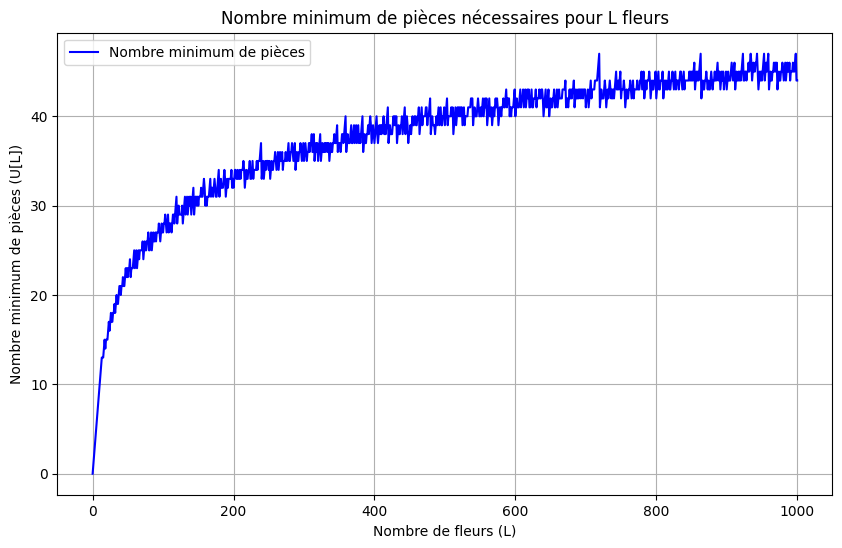

In [4]:
import math
import matplotlib.pyplot as plt

def min_well_coin(L):
    U = [math.inf] * (L + 1)
    U[0] = 0
    U[1] = 1

    for i in range(2, L + 1):
        U[i] = min(U[i], U[i - 1] + 1)
        for k in range(1, i):
            if i % k == 0:
                U[i] = min(U[i], U[k] + 4 + 2 * (i // k - 1))

    return U  # Retourne toute la liste U

# Calcul des valeurs de U pour L allant de 0 à 1000
L = 1000
U_values = min_well_coin(L)

# Tracé du graphe
plt.figure(figsize=(10, 6))
plt.plot(range(L + 1), U_values, label='Nombre minimum de pièces', color='blue')
plt.title('Nombre minimum de pièces nécessaires pour L fleurs')
plt.xlabel('Nombre de fleurs (L)')
plt.ylabel('Nombre minimum de pièces (U[L])')
plt.grid(True)
plt.legend()
plt.show()


### Explications

### Comment fonctionne la fonction `min_well_coin` ?

La fonction `min_well_coin` calcule le nombre minimum de pièces nécessaires pour obtenir un certain nombre de fleurs en utilisant les règles du puits magique. Voici comment elle fonctionne en trois étapes principales :
1. **Initialisation des valeurs de base**  
   La fonction initialise une liste $( U )$, où chaque $( U[i] )$ représente le nombre minimum de pièces nécessaires pour obtenir $( i )$ fleurs. Les valeurs de base sont :
   - $( U[0] = 0 )$ : Aucun coût pour 0 fleur.
   - $( U[1] = 1 )$ : Une pièce pour obtenir la première fleur.

2. **Mise à jour via des opérations simples**  
   Pour chaque $( i $) (de 2 à $( L )$), on explore deux façons d’obtenir $( i $) fleurs :
   - **Option 1 :** Utiliser une pièce pour passer de $( i-1 )$ à $( i )$ fleurs. Cela met à jour $( U[i] )$ avec :  
     $[
     U[i] = \min(U[i], U[i-1] + 1)
     ]$

3. **Mise à jour via des opérations complexes (puits magique)**  
   La fonction exploite le puits magique en mémorisant un état avec 4 pièces. Ensuite, pour chaque multiple $( j \cdot i )$, on calcule le coût d’obtention basé sur l’état mémorisé pour $( i )$ fleurs :
   $[
   U[j \cdot i] = \min(U[j \cdot i], U[i] + 4 + 2 \times (j - 1))
   ]$
   Cette opération met à jour tous les multiples $( j \cdot i )$ pour $( i < j \cdot i \leq L )$.

Quelle est la complexité temporelle de cet algorithme ? Que pouvez-vous en dire au regard de la recherche exhaustive codée plus tôt en lab ?

### Explications

### Complexité temporelle de l'algorithme

La complexité temporelle de l'algorithme est $O(L^2)$, où $L$ est la valeur maximale de fleurs pour laquelle nous calculons le nombre minimum de pièces. Voici pourquoi :

- **Boucle principale** : La boucle principale itère sur chaque valeur de $i$ de $2$ à $L$. Cela donne une complexité de $O(L)$.
- **Boucle interne** : Pour chaque $i$, la boucle interne explore les diviseurs de $i$ pour mettre à jour les valeurs de $U$. La boucle interne a une complexité de $O(i)$ dans le pire des cas.
- **Complexité totale** : En combinant les deux boucles, la complexité totale est $O(L^2)$.
- **Comparaison avec la recherche exhaustive** : La recherche exhaustive avait une complexité de $O(3^L)$, ce qui est exponentiellement plus élevé que la complexité actuelle. L'algorithme de programmation dynamique est donc beaucoup plus efficace pour calculer le nombre minimum de pièces.